In [1]:
#import libraries
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv("api.env")

True

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [3]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-14", tz="America/New_York").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000

# Get 1 year's worth of historical data for Tesla and Coca-Cola
# YOUR CODE HERE!
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display sample data
df_ticker.head(10)

KO                                       TSLA  \
                            open    high      low   close    volume    open   
time                                                                          
2020-10-14 00:00:00-04:00  50.05  50.490  49.6500  50.130  16816674  449.78   
2020-10-15 00:00:00-04:00  49.40  50.130  49.3000  49.990  15513733  450.30   
2020-10-16 00:00:00-04:00  49.99  50.350  49.8700  50.030  23943542  454.48   
2020-10-19 00:00:00-04:00  50.03  50.480  49.4600  49.625  13325403  446.24   
2020-10-20 00:00:00-04:00  49.89  50.620  49.7900  50.220  17512671  431.75   
2020-10-21 00:00:00-04:00  49.96  50.430  49.7700  49.980  18113467  422.70   
2020-10-22 00:00:00-04:00  51.17  51.200  50.3800  50.670  34220410  442.07   
2020-10-23 00:00:00-04:00  51.00  51.180  50.4650  50.525  22376192  421.84   
2020-10-26 00:00:00-04:00  50.34  50.510  49.2000  49.810  24670659  411.63   
2020-10-27 00:00:00-04:00  49.81  50.285  49.5533  49.890  21343701  423.76   

                                                                  
                               high       low    close    volume  
time                                                              
2020-10-14 00:00:00-04:00  465.9000  447.3500  461.470  45481608  
2020-10-15 00:00:00-04:00  456.5700  442.5000  448.880  33286568  
2020-10-16 00:00:00-04:00  455.9499  438.8500  439.910  30604148  
2020-10-19 00:00:00-04:00  447.0000  428.8700  430.830  30760868  
2020-10-20 00:00:00-04:00  431.7500  419.0501  421.970  29334383  
2020-10-21 00:00:00-04:00  432.9500  421.2500  422.500  22771969  
2020-10-22 00:00:00-04:00  445.2300  424.5100  425.900  36750565  
2020-10-23 00:00:00-04:00  422.8859  407.3801  420.615  31969114  
2020-10-26 00:00:00-04:00  425.7600  410.0000  420.280  26973706  
2020-10-27 00:00:00-04:00  430.5000  420.1000  424.471  21007688

In [4]:
# Create and empty DataFrame for closing prices

df_closing_prices = pd.DataFrame()
# Fetch the closing prices of KO and TSLA
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]
df_closing_prices["KO"] = df_ticker["KO"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
# Display sample data
df_daily_returns.head(10)

,TSLA,KO
2020-10-15,-0.027282,-0.002793
2020-10-16,-0.019983,0.000800
2020-10-19,-0.020641,-0.008095
2020-10-20,-0.020565,0.011990
2020-10-21,0.001256,-0.004779
2020-10-22,0.008047,0.013806
2020-10-23,-0.012409,-0.002862
2020-10-26,-0.000796,-0.014151
2020-10-27,0.009972,0.001606
2020-10-28,-0.043515,-0.038485


<AxesSubplot:ylabel='Frequency'>

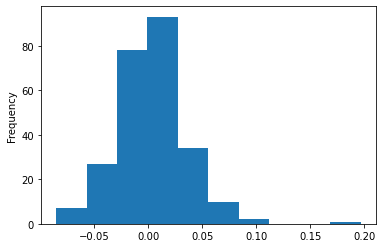

In [5]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns["TSLA"].plot.hist()